# CIFAR-10 and Fashion-MNIST datasets

_24 July 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

These are the first runs I tried on the CIFAR-10 and Fashion-MNIST datasets, just to see what would happen. Pretty simple models, so not expecting much.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from plots_utils import plot_averaged_training_charts, plot_comparison, show_timestamp_info

In [2]:
analog_paths = [
    Path("results/20210723-other-datasets-dynpower-premomclient/"),
    Path("results/20210724-other-datasets-dynpower/"),
    Path("results/20210725-other-datasets-dynpower/"),
]
show_timestamp_info(analog_paths)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Jul 2021, 19:34:11** | 23 Jul 2021, 20:12:29 | 38 min 18 s |
| last to finish | 25 Jul 2021, 11:33:05 | **25 Jul 2021, 11:56:05** | 22 min 59 s |
| shortest | 25 Jul 2021, 01:37:20 | 25 Jul 2021, 01:57:47 | **20 min 27 s** |
| longest | 24 Jul 2021, 19:22:44 | 24 Jul 2021, 20:03:23 | **40 min 39 s** |


In [3]:
digital_paths = [
    Path("results/20210723-other-datasets-dynquant-premomclient/"),
    Path("results/20210724-other-datasets-dynquant/"),
    Path("results/20210725-other-datasets-dynquant/"),
]
show_timestamp_info(digital_paths)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Jul 2021, 19:33:59** | 23 Jul 2021, 20:12:03 | 38 min 04 s |
| last to finish | 25 Jul 2021, 11:53:10 | **25 Jul 2021, 12:14:42** | 21 min 32 s |
| shortest | 25 Jul 2021, 11:53:10 | 25 Jul 2021, 12:14:42 | **21 min 32 s** |
| longest | 24 Jul 2021, 20:06:20 | 24 Jul 2021, 20:48:55 | **42 min 35 s** |


In [4]:
def get_comparison_args(dataset, clients, lr_client=0.01, momentum_client=[0.0, '__missing__'], noise='__all__'):
    common_fixed_specs = {
        'rounds': 150,
        'batch_size': 64,
        'epochs': 1,
        'ema_coefficient': 1 / 3,
        'data_per_client': None,
    }

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'power_update_period': 1,
        'power_quantile': 0.9,
        'power_factor': 0.9,
    })
    title_specs = {
        'power': 1.0,
        'dataset': dataset,
        'clients': clients,
        'send': 'deltas',
        'momentum_client': momentum_client,
        'lr_client': lr_client,
    }
    series_specs = {
        'noise': noise,
    }
    all_analog_specs = title_specs, fixed_specs, series_specs

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'qrange_update_period': 1,
        'qrange_param_quantile': 0.9,
        'qrange_client_quantile': 0.9,
        'channel_uses': None,
        'rounding_method': 'stochastic',
        'zero_bits_strategy': 'read-zero',
    })

    all_digital_specs = title_specs, fixed_specs, series_specs
    
    return all_analog_specs, all_digital_specs

In [5]:
# turn on or off for all plots
plot_range = False

# CIFAR-10

I think this requires a lot more tuning or a better model. I wouldn't trust these results as a representation of what happens when CIFAR-10 is set up properly. Notice that the $n = 5$ plots flatten out and then go down slightly.

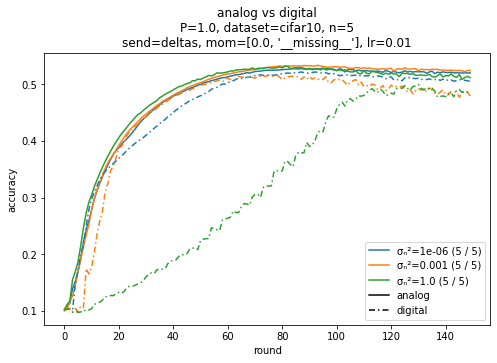

In [6]:
all_specs = get_comparison_args('cifar10', 5)
plot_comparison('accuracy', analog_paths, digital_paths, *all_specs, plot_range=plot_range)

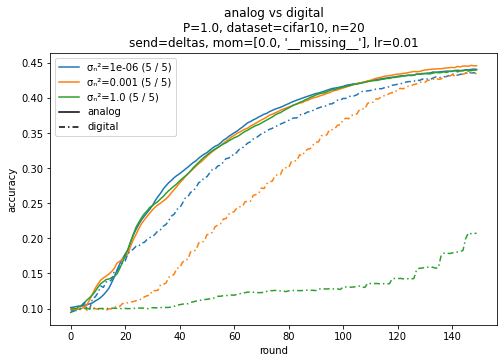

In [7]:
all_specs = get_comparison_args('cifar10', 20)
plot_comparison('accuracy', analog_paths, digital_paths, *all_specs, plot_range=plot_range)

In [8]:
analog_paths_with_momentum = analog_paths[1:]
digital_paths_with_momentum = digital_paths[1:]

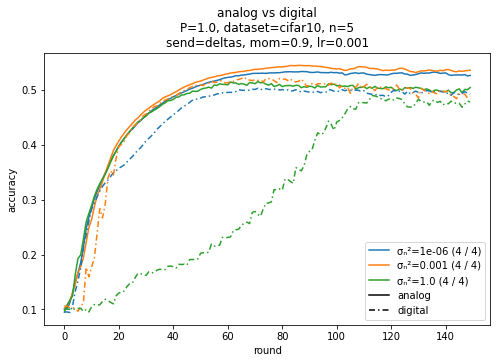

In [9]:
all_specs = get_comparison_args('cifar10', 5, lr_client=1e-3, momentum_client=0.9)
plot_comparison('accuracy', analog_paths_with_momentum, digital_paths_with_momentum, *all_specs, plot_range=plot_range)

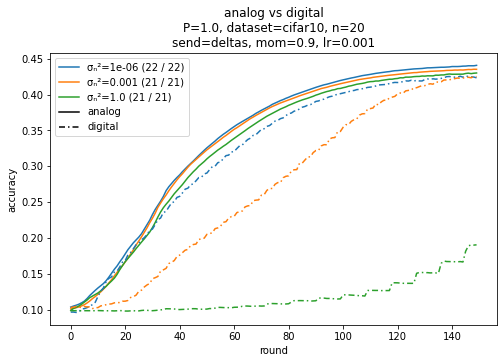

In [10]:
all_specs = get_comparison_args('cifar10', 20, lr_client=1e-3, momentum_client=0.9)
plot_comparison('accuracy', analog_paths_with_momentum, digital_paths_with_momentum, *all_specs, plot_range=plot_range)

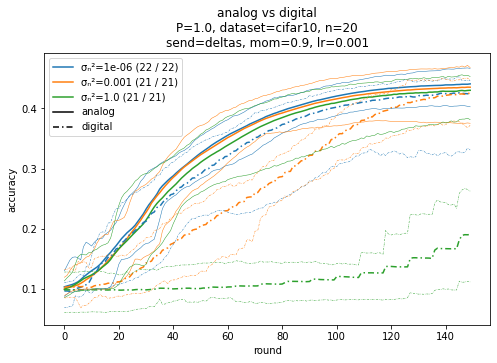

In [11]:
all_specs = get_comparison_args('cifar10', 20, lr_client=1e-3, momentum_client=0.9)
plot_comparison('accuracy', analog_paths_with_momentum, digital_paths_with_momentum, *all_specs, plot_range=True)

# Fashion-MNIST

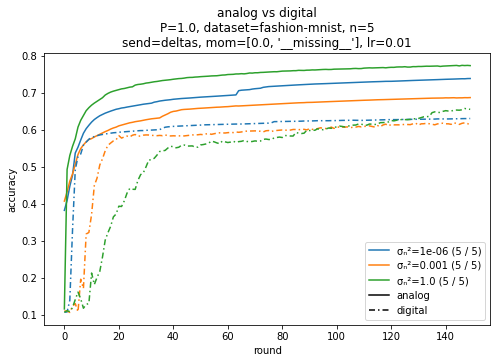

In [12]:
all_specs = get_comparison_args('fashion-mnist', 5)
plot_comparison('accuracy', analog_paths, digital_paths, *all_specs, plot_range=plot_range)

Seems like with $n = 5$, the digital schemes caps out at an accuracy roughly independent of noise.

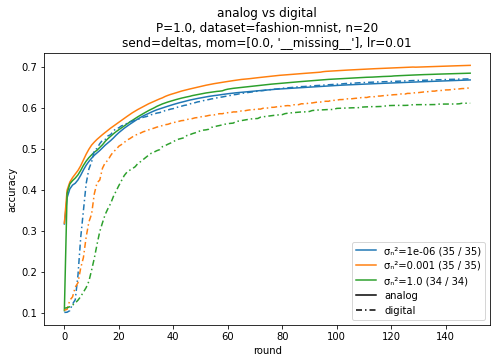

In [13]:
all_specs = get_comparison_args('fashion-mnist', 20)
plot_comparison('accuracy', analog_paths, digital_paths, *all_specs, plot_range=plot_range)

The $\sigma_\mathrm{n}^2 = 10^{-6}$ case catches up. For the others, check the quartiles and range:

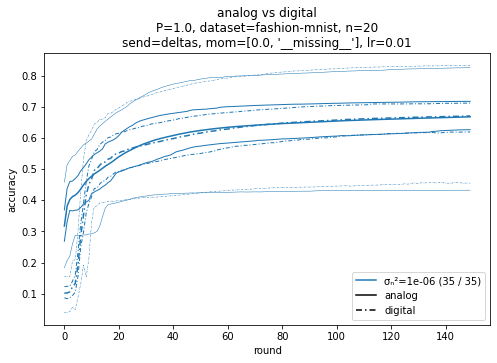

In [14]:
all_specs = get_comparison_args('fashion-mnist', 20, noise=1e-6)
plot_comparison('accuracy', analog_paths, digital_paths, *all_specs, plot_range=True, plot_quartiles=True)

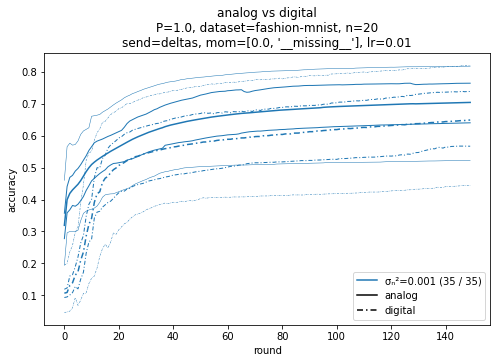

In [15]:
all_specs = get_comparison_args('fashion-mnist', 20, noise=1e-3)
plot_comparison('accuracy', analog_paths, digital_paths, *all_specs, plot_range=True, plot_quartiles=True)

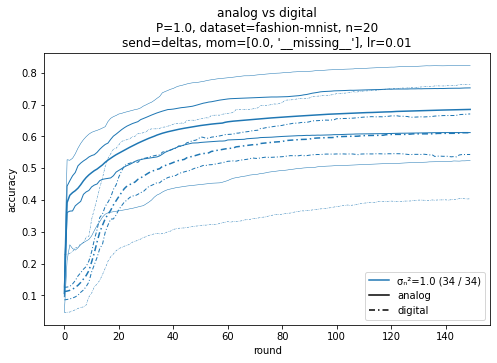

In [16]:
all_specs = get_comparison_args('fashion-mnist', 20, noise=1)
plot_comparison('accuracy', analog_paths, digital_paths, *all_specs, plot_range=True, plot_quartiles=True)